# PREDICTION MODEL TotalGHGEmissions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import datetime as dt
import scipy.stats as st
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from scipy.stats import kruskal
import re
import missingno as msno
from tqdm import tqdm
import locale
import os #intéragir avec le système d'exploitation
import zipfile #lecture et écriture pour les fichiers zip
import urllib #gestion des url
!pip install folium
import folium
!pip install geopy
from geopy.geocoders import Nominatim
import plotly.express as px
from geopy.distance import geodesic
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import time
from time import time, gmtime, strftime 
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.utils import shuffle
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install shap
!pip install shap --upgrade
import shap
!pip install lime
import lime
from lime import lime_tabular

## Initialisation

In [2]:
data_model_1 = pd.read_csv('data_model_1.csv')

In [3]:
pd.set_option('display.max_column',46)
pd.set_option('display.max_row',150)

In [4]:
data_model_1.head()

,Latitude,Longitude,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s)(%),BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,AgeBuilt,Source_principale,Source_secondaire,Source_tertiaire,TotalGHGEmissions
0,47.61220,-122.33799,88434.0,0.0,0.0,100.000,NonResidential,Hotel,98101.0,7,Downtown,1.0,12,Hotel,None,None,Compliant,89,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),249.98
1,47.61317,-122.33393,83880.0,15064.0,4622.0,85.455,NonResidential,Hotel,98101.0,7,Downtown,1.0,11,Hotel,Parking,Restaurant,Compliant,20,NaturalGas(kBtu),Electricity(kBtu),None,295.86
2,47.61393,-122.33810,756493.0,0.0,0.0,79.425,NonResidential,Hotel,98101.0,7,Downtown,1.0,41,Hotel,None,None,Compliant,47,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),2089.28
3,47.61412,-122.33664,61320.0,0.0,0.0,100.000,NonResidential,Hotel,98101.0,7,Downtown,1.0,10,Hotel,None,None,Compliant,90,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),286.43
4,47.61375,-122.34047,123445.0,68009.0,0.0,64.688,NonResidential,Hotel,98121.0,7,Downtown,1.0,18,Hotel,Parking,Swimming Pool,Compliant,36,NaturalGas(kBtu),Electricity(kBtu),None,505.01


In [5]:
col_model_1_quantitative = ['Latitude', 'Longitude', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                            'ThirdLargestPropertyUseTypeGFA',
                             'PropertyGFABuilding(s)(%)']

col_model_1_categoriel = ['BuildingType','PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'NumberofBuildings',
                          'NumberofFloors','LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ComplianceStatus'
                         , 'AgeBuilt', 'Source_principale','Source_secondaire','Source_tertiaire']

In [6]:
print('Nbre colonne data_model_1 :', data_model_1.shape[1])
print('Nbre colonne col_model_1_quantitative :', len(col_model_1_quantitative))
print('Nbre colonne col_model_1_categoriel :', len(col_model_1_categoriel))

Nbre colonne data_model_1 : 22
Nbre colonne col_model_1_quantitative : 6
Nbre colonne col_model_1_categoriel : 15


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


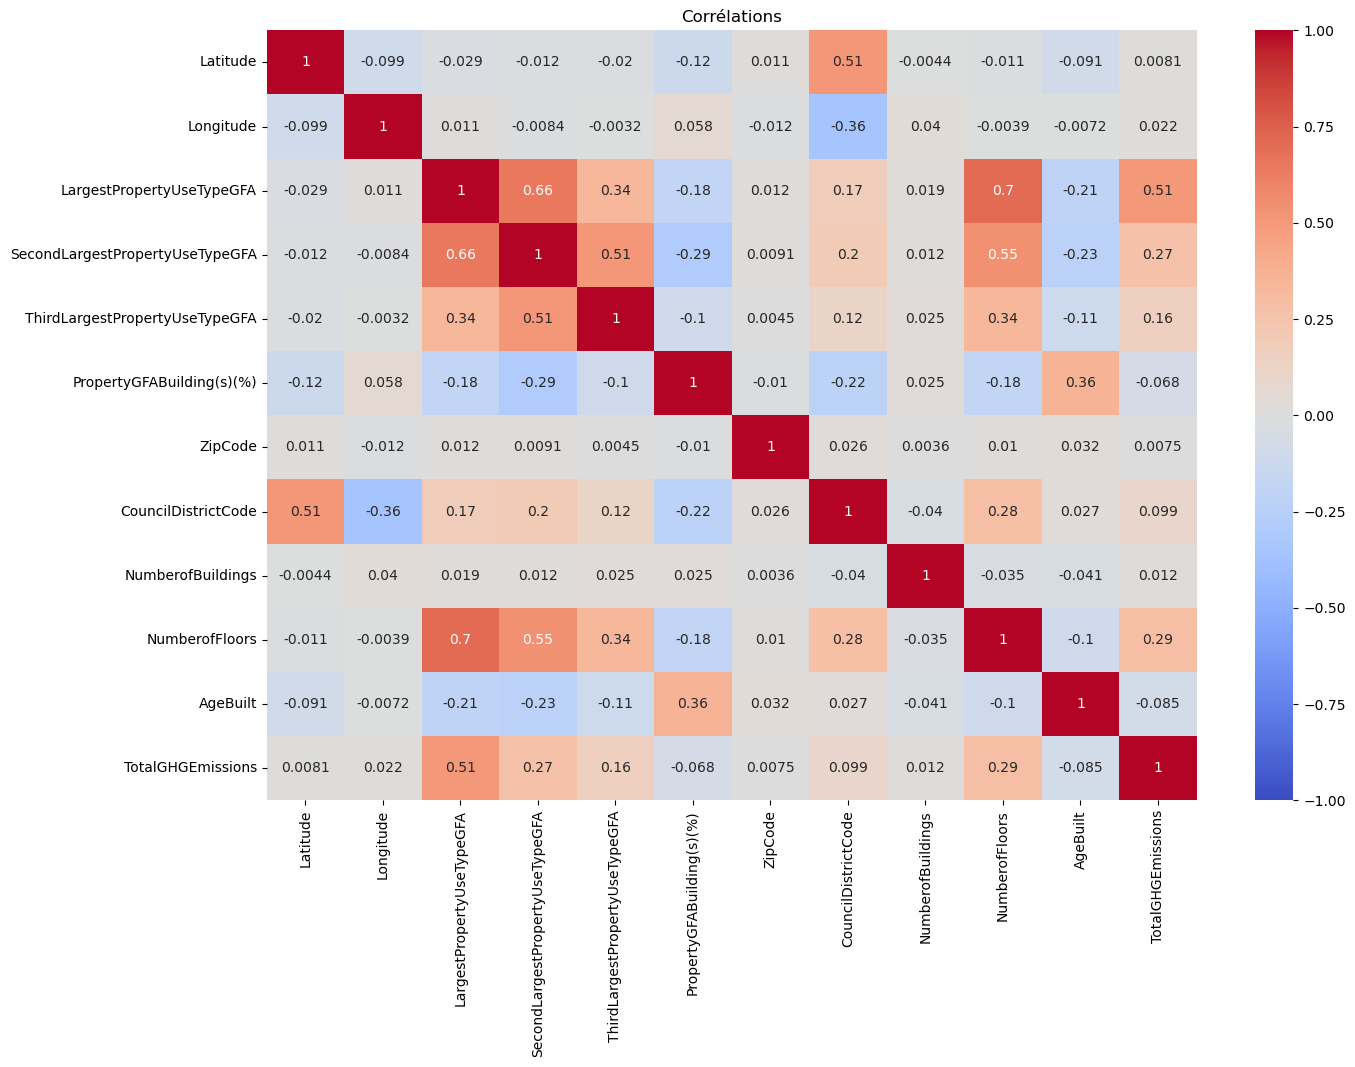

In [7]:
# Graphique heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(data_model_1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Corrélations')
plt.show()

In [8]:
data_model_1.dtypes

Latitude                           float64
Longitude                          float64
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseTypeGFA     float64
PropertyGFABuilding(s)(%)          float64
BuildingType                        object
PrimaryPropertyType                 object
ZipCode                            float64
CouncilDistrictCode                  int64
Neighborhood                        object
NumberofBuildings                  float64
NumberofFloors                       int64
LargestPropertyUseType              object
SecondLargestPropertyUseType        object
ThirdLargestPropertyUseType         object
ComplianceStatus                    object
AgeBuilt                             int64
Source_principale                   object
Source_secondaire                   object
Source_tertiaire                    object
TotalGHGEmissions                  float64
dtype: object

In [9]:
X = data_model_1.drop(['TotalGHGEmissions'], axis=1)
y = data_model_1[['TotalGHGEmissions']]
X, y = shuffle(X, y)

In [10]:
data_model_1.isnull().sum()

Latitude                           0
Longitude                          0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
PropertyGFABuilding(s)(%)          0
BuildingType                       0
PrimaryPropertyType                0
ZipCode                            0
CouncilDistrictCode                0
Neighborhood                       0
NumberofBuildings                  0
NumberofFloors                     0
LargestPropertyUseType             0
SecondLargestPropertyUseType       0
ThirdLargestPropertyUseType        0
ComplianceStatus                   0
AgeBuilt                           0
Source_principale                  0
Source_secondaire                  0
Source_tertiaire                   0
TotalGHGEmissions                  0
dtype: int64

## Fonctions

In [11]:
def cross_validation (pipeline_svm, return_type='max_coords') : 
    # Mesurer le temps d'exécution
    start_time = time()
    
    mean_scores = []

    for i in range(2, 30):
        # Calculer le score R² en utilisant une validation croisée 
        cross_val_r2 = cross_val_score(pipeline_svm, X, y, scoring='r2', cv=i)

        # Calculer le score R² moyen
        mean_r2 = np.mean(cross_val_r2)

        # Stocker le score R² moyen dans la liste
        mean_scores.append(mean_r2)

    max_index = np.argmax(mean_scores)
    max_coords = (max_index + 2, mean_scores[max_index])
    
    # Calcul du temps écoulé
    elapsed_time = time() - start_time

    # Créer un graphique des scores R² moyens en fonction de k
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(2, 30), y=mean_scores, marker='o')
    plt.scatter(*max_coords, color='red')  # Ajouter le point le plus haut en rouge
    plt.title('Score R² moyen en fonction du nombre de plis (k)')
    plt.xlabel('Nombre de plis (k)')
    plt.ylabel('Score R² moyen')
    plt.xticks(np.arange(2, 30, 2))

    # Afficher les coordonnées du point le plus haut
    plt.annotate(f'Coordonnées\n({max_coords[1]:.4f} ; {max_coords[0]:.0f})', max_coords,
                 textcoords="offset points", xytext=(0,-20), ha='center', color='red')

    plt.show()
    
    # Retourner le résultat en fonction de return_type
    if return_type == 'max_coords':
        return max_coords
    elif return_type == 'elapsed_time':
        return elapsed_time
    else:
        raise ValueError("Le paramètre 'return_type' doit être 'max_coords' ou 'elapsed_time_minutes'.")

In [ ]:
def best_gridsearchcv (pipeline) :
    # Recherche d'hyperparamètres avec validation croisée
    grid_search_svm = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2', cv=max_coords[0])
    grid_search_svm.fit(X_train, y_train)

    # Afficher les meilleurs hyperparamètres
    best_params_svm = grid_search_svm.best_params_
    print(f'Best Hyperparameters for SVM: {best_params_svm}')

In [12]:
def model_info (pipeline) :
    print('CrossValidation')
    print('--------------------------------------')
    # Afficher les scores R² pour chaque pli
    print(f"Scores R² pour chaque pli (k={max_coords[0]}): {cross_val_r2}")

    # Afficher le score R² moyen
    print(f"Score R² moyen (k={max_coords[0]}): {np.mean(cross_val_r2)}")


    y_train_predict = pipeline.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)
    print('\n') 
    print('La performance du modèle sur la base d\'apprentissage')
    print('--------------------------------------')
    print('L\'erreur quadratique moyenne est (RMSE) {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))
    print('\n')

    # model evaluation for testing set
    y_test_predict = pipeline.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('L\'erreur quadratique moyenne est (RMSE) {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))

In [13]:
# Création du DataFrame pour stocker les résultats
best_model = pd.DataFrame(columns=['Algo','Parameters', 'R-squared', 'RMSE', 'MAE', 'Time'])

def model_summary(algo, pipeline, parameters):
    global best_model

    # Mesurer le temps d'exécution
    start_time = time()

    # Faire des prédictions
    y_test_predict = pipeline.predict(X_test)

    # Calculer les métriques de performance
    r_squared = r2_score(y_test, y_test_predict)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    mae = mean_absolute_error(y_test, y_test_predict)
    
    # Calcul du temps écoulé
    elapsed_time = time() - start_time
    
    # Temps de la crossvalidation
    elapsed_time_cv = cross_validation(pipeline, return_type='elapsed_time')
    
    # Temps de l'optimisation
    
    
    time_total = elapsed_time + elapsed_time_cv
    
    # Conversion du temps en struct_time
    elapsed_time_struct = gmtime(time_total)

    # Formater le temps en minutes et en secondes
    elapsed_time_minutes = strftime("%M min %S sec", elapsed_time_struct)
    


    # Ajouter les résultats au DataFrame
    results = pd.DataFrame({'Algo': [algo],
                            'Parameters' : parameters,
                            'R-squared': [r_squared],
                            'RMSE': [rmse],
                            'MAE' : [mae],
                            'Time': [elapsed_time_minutes]})
    
    best_model = pd.concat([best_model, results], ignore_index=True)

    # Afficher les résultats
    display(best_model)

**LES ALGORITHMES**

Nous allons utiliser 3 familles d'algorithmes différents pour les test de machine learning :
- La régression linéaire 
- Les vecteurs
- Les arbres de décisions

Ces 3 familles font parties des algorithmes dit supervisés, c'est-à-dire qu'ils utilises les étiquettes (labels) contrairement aux algorithmes non supervisés qui n'en ont pas. 

On utilise les algorithmes supervisés pour de la classification ou de la regression (comme ici).

## Regression linéaire

### Encodage

**ENCODER**

Utilisation de OneHotEncoder afin de ne pas avoir de relation d'ordre entre les variables.

In [14]:
# Colonnes catégorielles
categorical_columns = col_model_1_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), col_model_1_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_1_categoriel),
    ],
    remainder='passthrough'
)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape
display(X_train.head())

,Latitude,Longitude,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s)(%),BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,AgeBuilt,Source_principale,Source_secondaire,Source_tertiaire
1084,47.57507,-122.33349,19715.0,12000.0,6000.0,100.0,NonResidential,Other,98134.0,2,Greater Duwamish,2.0,1,Other,Office,Retail Store,Compliant,100,NaturalGas(kBtu),Electricity(kBtu),None
428,47.61400,-122.35375,171783.0,9581.0,4413.0,100.0,NonResidential,Large Office,98121.0,7,Downtown,1.0,3,Office,Non-Refrigerated Warehouse,Other - Recreation,Compliant,23,Electricity(kBtu),None,None
663,47.63629,-122.35922,14317.0,7701.0,3045.0,100.0,Nonresidential COS,Other,98119.0,7,Magnolia / Queen Anne,1.0,1,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,Compliant,68,NaturalGas(kBtu),Electricity(kBtu),None
497,47.54699,-122.32882,245240.0,5616.0,5616.0,100.0,NonResidential,Large Office,98108.0,2,Greater Duwamish,1.0,5,Office,Parking,Parking,Compliant,41,Electricity(kBtu),None,None
1012,47.58698,-122.32397,25880.0,0.0,0.0,100.0,NonResidential,Retail Store,98134.0,2,Greater Duwamish,1.0,1,Retail Store,None,None,Compliant,72,Electricity(kBtu),None,None


In [17]:
X_test.shape

(290, 21)

**DATA LEAKAGE**

- Aucune normalisation n'est effectuée avant la séparation du jeu de donnée.
- Les doublons ont été traité. 
- Les données concernant les relevés énergétiques ont été retiré de la base de donnée.

### Transformation

In [18]:
# Transformation logarithmique

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Créer le pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# Entraîner le modèle sur l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

### Validation croisée

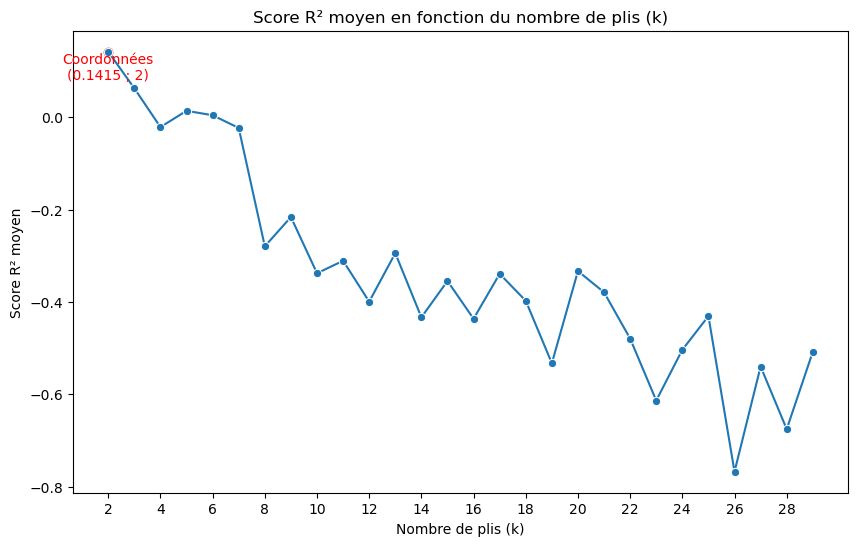

In [19]:
max_coords = cross_validation(pipeline, return_type='max_coords')

In [20]:
cross_val_r2 = cross_val_score(pipeline, X, y, scoring='r2', cv=max_coords[0])

model_info(pipeline)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=2): [0.11137611 0.17154074]
Score R² moyen (k=2): 0.1414584288381428


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.5908534896172694
Le score R2 est 0.8195370180853916


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.9811854701295507
Le score R2 est 0.5512286640310501


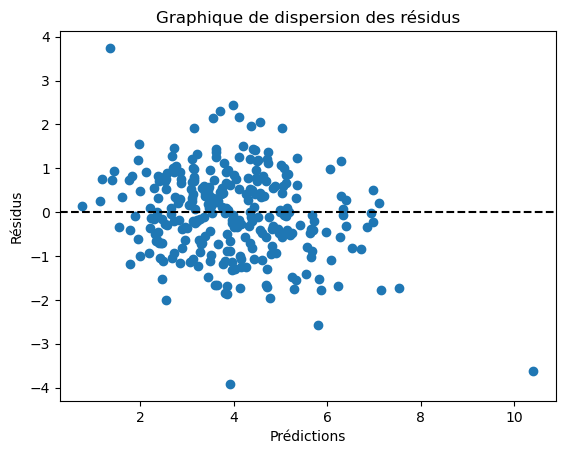

In [21]:
# Graphique de dispersion des résidus
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Graphique de dispersion des résidus')
plt.show()

### Evaluation

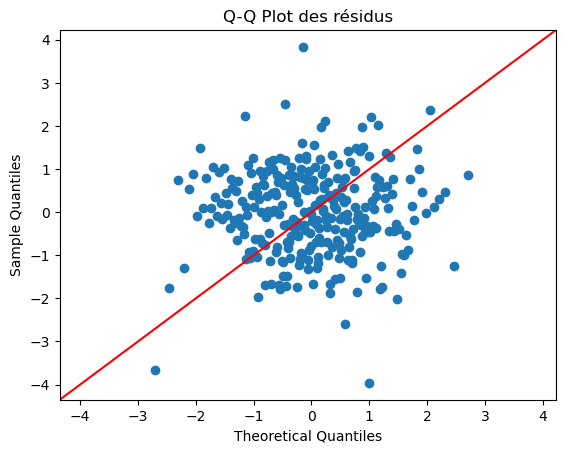

In [22]:
# Calculer les quantiles théoriques pour une distribution normale
residuals_std = (residuals - residuals.mean()) / residuals.std()
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals)))

# Créer le Q-Q plot
sm.qqplot(residuals_std, line='45')
plt.title('Q-Q Plot des résidus')
plt.show()

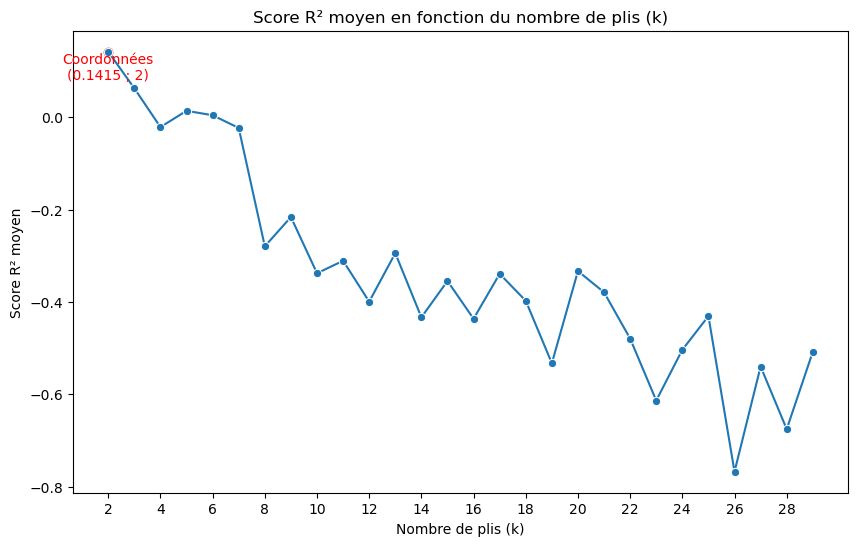

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.551229,0.981185,0.765393,00 min 09 sec


In [23]:
model_summary('Regression_linear', pipeline, 'MinMax')

## ElasticNet

L'algorithme ElasticNet est une régression linéaire de régularisation qui permet d'éviter l'overfiting. Elle se base sur la régularisation L1 et L2 :
1. Gère la sélection des variables
2. Gère la multicolinéarité

### Encodage

In [24]:
X = data_model_1.drop(['TotalGHGEmissions'], axis=1)
y = data_model_1[['TotalGHGEmissions']]
X, y = shuffle(X, y)

In [25]:
# Colonnes catégorielles
categorical_columns = col_model_1_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), col_model_1_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_1_categoriel),
    ],
    remainder='passthrough'
)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

On utilise la transformation logarithmique sur la variable dépendante 'y' afin de stabiliser la variance et linéariser les relations.

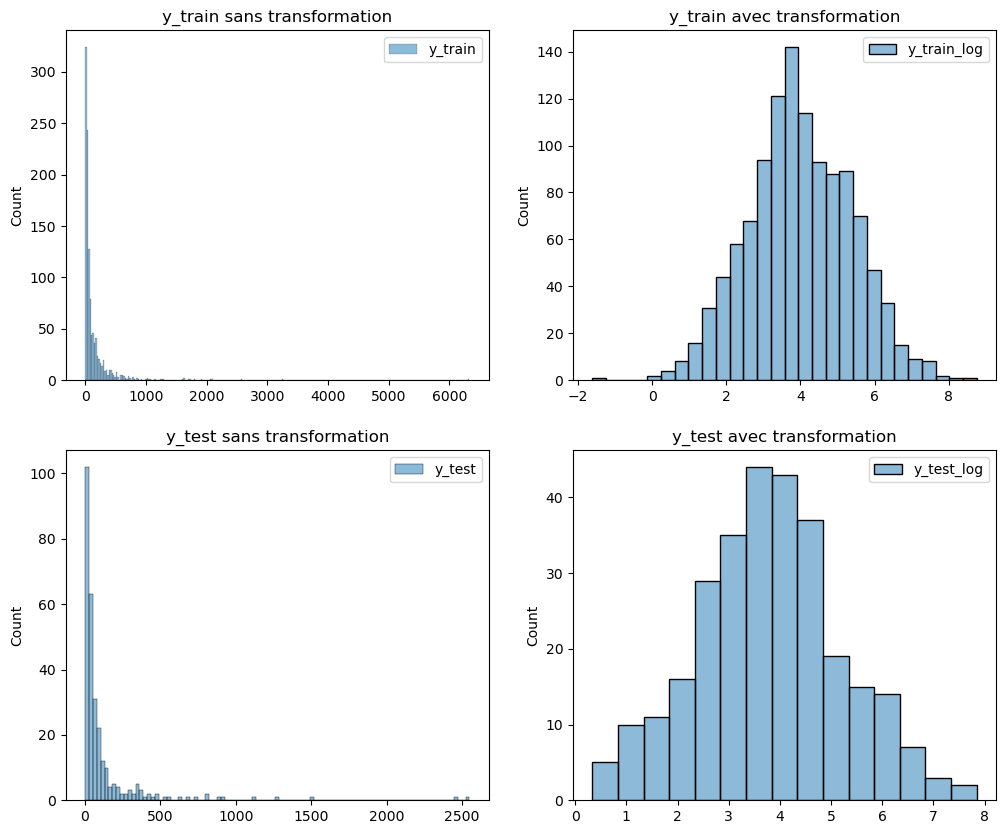

In [27]:
# Visualisation de la transformation logarithmique

# Données
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Premier sous-graphique
sns.histplot(y_train, color='blue', label='y_train', ax=axs[0, 0])
axs[0, 0].set_title('y_train sans transformation')
axs[0, 0].legend()

# Deuxième sous-graphique
sns.histplot(y_train_log, color='blue', label='y_train_log', ax=axs[0, 1])
axs[0, 1].set_title('y_train avec transformation')
axs[0, 1].legend()

# Troisième sous-graphique
sns.histplot(y_test, color='blue', label='y_test', ax=axs[1, 0])
axs[1, 0].set_title('y_test sans transformation')
axs[1, 0].legend()

# Quatrième sous-graphique
sns.histplot(y_test_log, color='blue', label='y_test_log', ax=axs[1, 1])
axs[1, 1].set_title('y_test avec transformation')
axs[1, 1].legend()

plt.show()

In [28]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [29]:
# Créer le pipeline
pipeline_elastic = Pipeline([
    ('preprocessor', preprocessor),
    ('elastic_net', ElasticNet(alpha=0.001, l1_ratio=0.9) )])

# Modèle Elastic Net
pipeline_elastic.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_elastic.predict(X_test)

### Optimisation

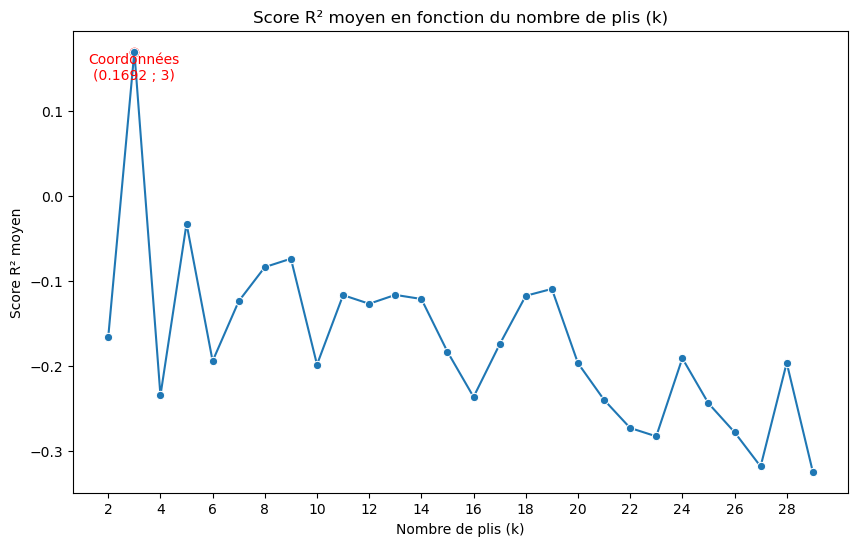

In [30]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
max_coords = cross_validation(pipeline_elastic, return_type='max_coords')

In [31]:
cross_val_r2 = cross_val_score(pipeline_elastic, X, y, scoring='r2', cv=max_coords[0])

model_info(pipeline_elastic)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=3): [0.27333649 0.15603177 0.07817618]
Score R² moyen (k=3): 0.16918148078539683


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.6719611196652969
Le score R2 est 0.7696616245672219


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.7811959733998477
Le score R2 est 0.6973270920083936


In [32]:
# Grille de valeurs d'alpha et l1_ratio à explorer
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}

# Recherche d'hyperparamètres
pipeline_elastic_grid = Pipeline([
    ('preprocessor', preprocessor),
    ('grid', GridSearchCV(estimator=ElasticNet(), param_grid=param_grid, scoring='r2', cv=max_coords[0]))])

pipeline_elastic_grid.fit(X_train, y_train)

# Résultats
best_params = pipeline_elastic_grid.named_steps['grid'].best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.9}


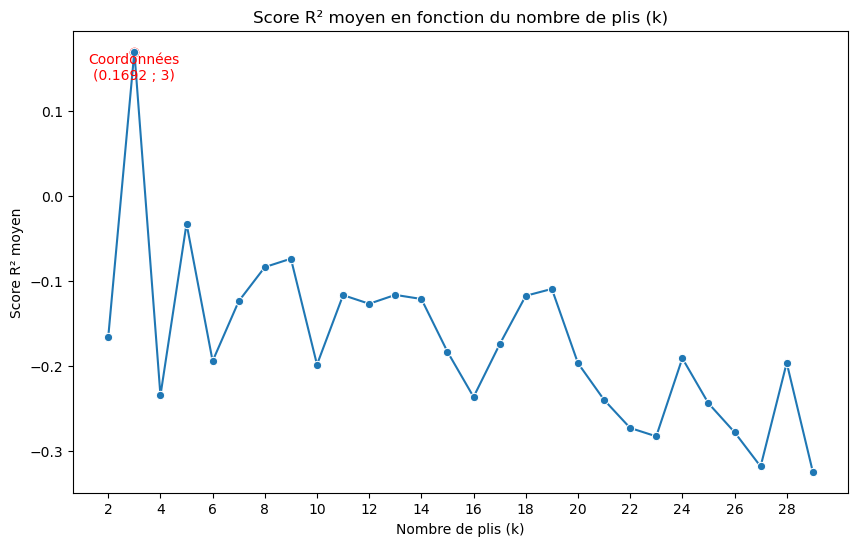

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.551229,0.981185,0.765393,00 min 09 sec
1,ElasticNet,"{alpha : 0.001, l1_ratio: 0.9}",0.697327,0.781196,0.605073,05 min 19 sec


In [33]:
model_summary('ElasticNet', pipeline_elastic, '{alpha : 0.001, l1_ratio: 0.9}')

## SVM

Algorithme de classification et régression qui se base sur les hyperplans.

### Encodage

In [34]:
X = data_model_1.drop(['TotalGHGEmissions'], axis=1)
y = data_model_1[['TotalGHGEmissions']]
X, y = shuffle(X, y)

In [35]:
# Colonnes catégorielles
categorical_columns = col_model_1_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_model_1_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_1_categoriel),
    ],
    remainder='passthrough'
)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

In [37]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [38]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [39]:
# Créer le pipeline
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVR(kernel='rbf', C=1, gamma='scale') )])

# Modèle SVM
pipeline_svm.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_svm.predict(X_test)

In [40]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

### Optimisation

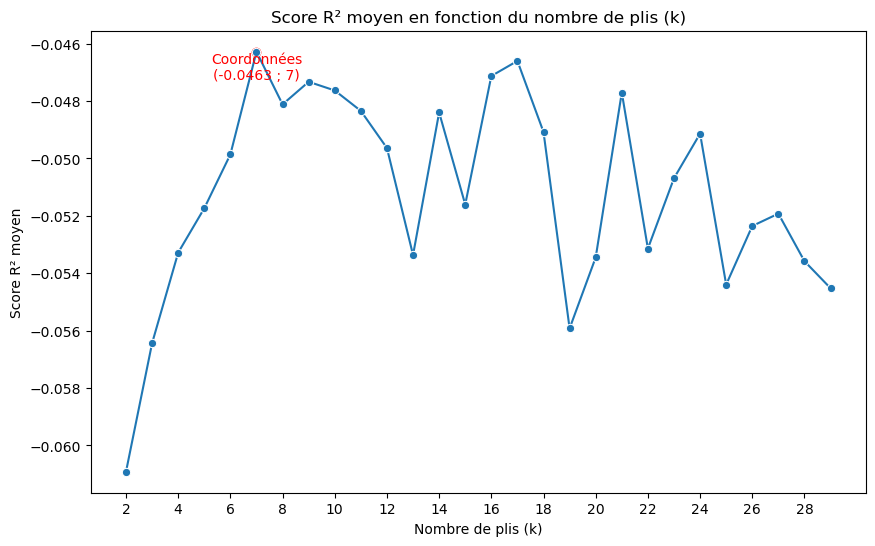

In [41]:
max_coords = cross_validation(pipeline_svm, return_type='max_coords')

In [42]:
model_info(pipeline_svm)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=7): [0.27333649 0.15603177 0.07817618]
Score R² moyen (k=7): 0.16918148078539683


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.5800374115054427
Le score R2 est 0.8306793608859968


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.7445968150910333
Le score R2 est 0.7139629567452657


In [43]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_svm = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid_svm, scoring='r2', cv=max_coords[0])
grid_search_svm.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_svm = grid_search_svm.best_params_
print(f'Best Hyperparameters for SVM: {best_params_svm}')

Best Hyperparameters for SVM: {'svm__C': 10.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


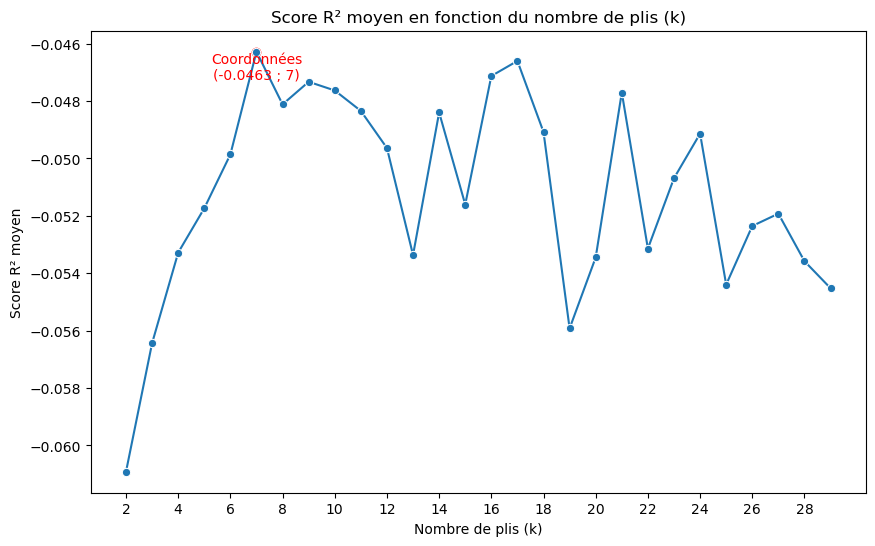

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.551229,0.981185,0.765393,00 min 09 sec
1,ElasticNet,"{alpha : 0.001, l1_ratio: 0.9}",0.697327,0.781196,0.605073,05 min 19 sec
2,SVM,"C: 1.0, gamma: scale, kernel: rbf",0.713963,0.744597,0.574007,00 min 59 sec


In [44]:
model_summary('SVM', pipeline_svm,'C: 1.0, gamma: scale, kernel: rbf' )

## GradientBoosting

### Encodage

In [45]:
X = data_model_1.drop(['TotalGHGEmissions'], axis=1)
y = data_model_1[['TotalGHGEmissions']]
X, y = shuffle(X, y)

In [46]:
# Colonnes catégorielles
categorical_columns = col_model_1_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), col_model_1_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_1_categoriel),
    ],
    remainder='passthrough'
)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

In [48]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [49]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [50]:
# Créer le pipeline
pipeline_gradient = Pipeline([
    ('preprocessor', preprocessor),
    ('gradient', GradientBoostingRegressor(n_estimators=150, learning_rate= 0.1,  max_depth=3, random_state=0) )])

# Modèle Gradient
pipeline_gradient.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_gradient.predict(X_test)

In [51]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

### Optimisation

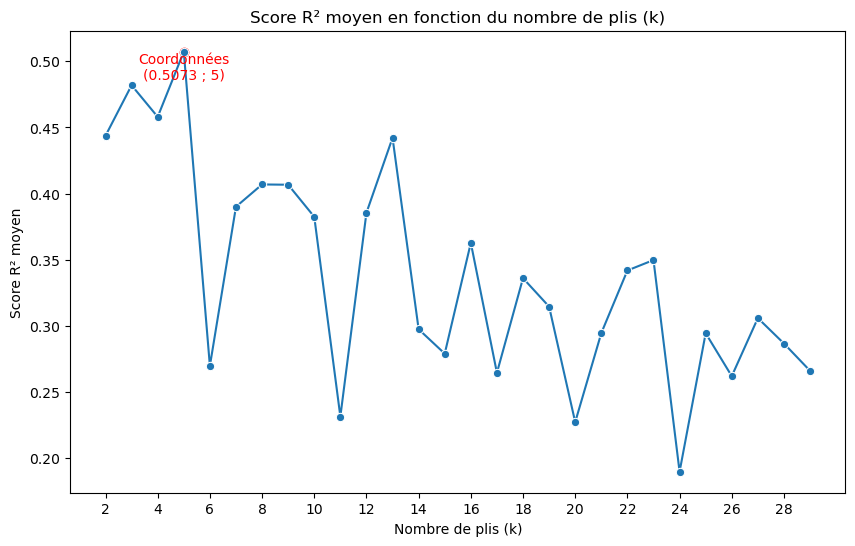

In [52]:
cross_val_r2 = cross_val_score(pipeline_gradient, X, y, scoring='r2', cv=max_coords[0])

max_coords = cross_validation(pipeline_gradient, return_type='max_coords')

In [53]:
model_info(pipeline_gradient)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=5): [0.62268232 0.56725799 0.43318658 0.15539689 0.45804313 0.04627358
 0.44703103]
Score R² moyen (k=5): 0.38998164593070106


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.5188837537777142
Le score R2 est 0.8632143330830181


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.7124527200117433
Le score R2 est 0.7477057119336643


In [54]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_gradient = {
    'gradient__n_estimators': [10, 50, 100, 150],
    'gradient__learning_rate': [0.01, 0.05, 0.1],
    'gradient__max_depth': [3, 4, 5],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_gradient = GridSearchCV(estimator=pipeline_gradient, param_grid=param_grid_gradient, scoring='r2', cv=max_coords[0])
grid_search_gradient.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_gradient = grid_search_gradient.best_params_
print(f'Best Hyperparameters for Gradient Boosting: {best_params_gradient}')

Best Hyperparameters for Gradient Boosting: {'gradient__learning_rate': 0.1, 'gradient__max_depth': 3, 'gradient__n_estimators': 150}


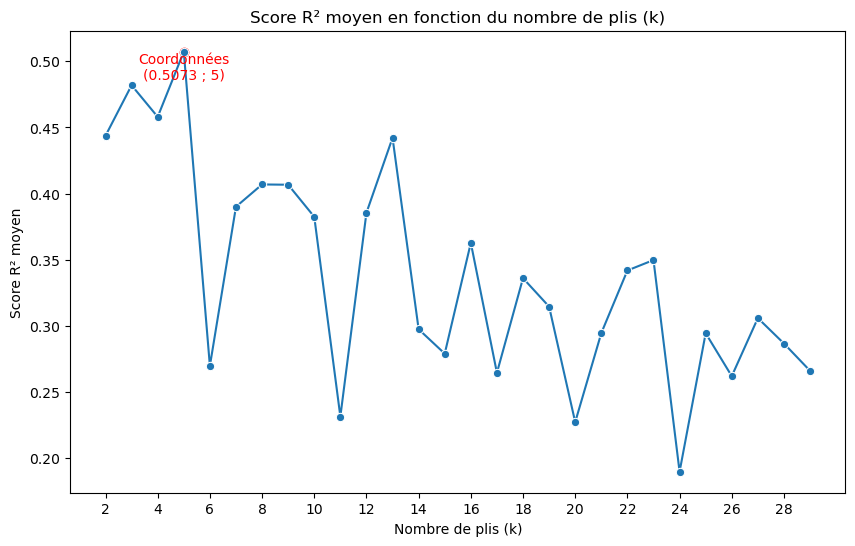

,Algo,Parameters,R-squared,RMSE,MAE,Time
0,Regression_linear,MinMax,0.551229,0.981185,0.765393,00 min 09 sec
1,ElasticNet,"{alpha : 0.001, l1_ratio: 0.9}",0.697327,0.781196,0.605073,05 min 19 sec
2,SVM,"C: 1.0, gamma: scale, kernel: rbf",0.713963,0.744597,0.574007,00 min 59 sec
3,GradientBoosting,"learning_rate: 0.1, max_depth: 3, n_estimators...",0.747706,0.712453,0.568019,02 min 04 sec


In [55]:
model_summary('GradientBoosting', pipeline_gradient,'learning_rate: 0.1, max_depth: 3, n_estimators: 150' )

## RandomForest

### Encodage

In [56]:
X = data_model_1.drop(['TotalGHGEmissions'], axis=1)
y = data_model_1[['TotalGHGEmissions']]
X, y = shuffle(X, y)

In [57]:
# Colonnes catégorielles
categorical_columns = col_model_1_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_model_1_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_1_categoriel),
    ],
    remainder='passthrough'
)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Transformation

In [59]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [60]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [61]:
# Créer le pipeline
pipeline_randomforest = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestRegressor(n_estimators=200, random_state=0) )])

# Modèle SVM
pipeline_randomforest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_randomforest.predict(X_test)

In [62]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

### Optimisation

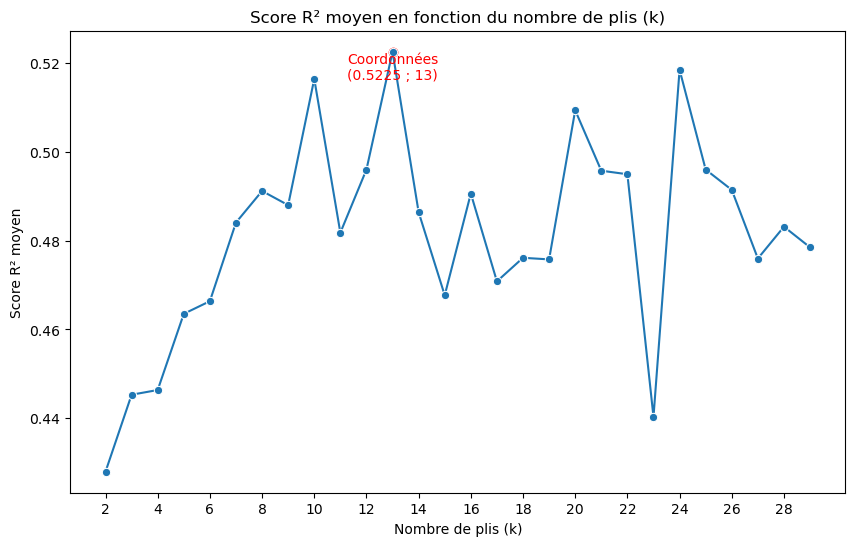

In [63]:
cross_val_r2 = cross_val_score(pipeline_randomforest, X, y, scoring='r2', cv=max_coords[0])

max_coords = cross_validation(pipeline_randomforest, return_type='max_coords')

In [64]:
model_info(pipeline_randomforest)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=13): [0.47580236 0.51960445 0.51183557 0.5169712  0.29336704]
Score R² moyen (k=13): 0.46351612217642557


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.28793534826751294
Le score R2 est 0.9579820867011591


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.7865385055158134
Le score R2 est 0.688646010129357


In [65]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_random = {
    'randomforest__n_estimators': [50, 100, 150, 200],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_random = GridSearchCV(estimator=pipeline_randomforest, param_grid=param_grid_random, scoring='r2', cv=max_coords[0])
grid_search_random.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_random = grid_search_random.best_params_
print(f'Best Hyperparameters for Random Forest : {best_params_random}')


Best Hyperparameters for Random Forest : {'randomforest__n_estimators': 200}


In [ ]:
model_summary('Random Forest', pipeline_randomforest,'n_estimators : 200' )

## Feature importance

### Global avec SHAP

On utilise SHAP pour déterminer les variables qui ont un impact sur le modèle. 

In [ ]:
# Appliquer le préprocesseur et transformer les données d'entraînement
X_train_processed = preprocessor.fit_transform(X_train)

# Aplatir y_train
y_train_flat = y_train.ravel()

# Initialiser le modèle RandomForest et le former sur les données prétraitées
randomforest = RandomForestRegressor()
randomforest.fit(X_train_processed, y_train_flat)

# Réduire le jeu de données avec kmeans (regroupement)
background_data = shap.kmeans(X_train_processed, 50) 

# Créer l'explainer SHAP avec le modèle RandomForest et les données prétraitées
explainer = shap.KernelExplainer(randomforest.predict, background_data, 
                                 feature_perturbation="correlation_dependent")

# Calculer les valeurs SHAP pour l'ensemble du jeu de test
shap_vals = explainer.shap_values(preprocessor.transform(X_test))

# Visualiser les valeurs SHAP
shap.summary_plot(shap_vals, preprocessor.transform(X_test),
                  feature_names=preprocessor.get_feature_names_out(),
                  plot_type="bar",
                  color="dodgerblue"
                  )

**CONCLUSION**

On peut voir que la dimension des batiments en fonction du type de propriété ainsi que la source d'énergie sont les indicateurs qui ont le plus d'impact sur les prédictions.

### Local avec SHAP

In [ ]:
X_test.index[0]

In [ ]:
# Appliquer le préprocesseur et transformer les données d'entraînement
X_train_processed = preprocessor.fit_transform(X_train)

# Aplatir y_train
y_train_flat = y_train.ravel()

# Initialiser le modèle RandomForest et le former sur les données prétraitées
randomforest = RandomForestRegressor()
randomforest.fit(X_train_processed, y_train_flat)

# Réduire le jeu de données avec kmeans (regroupement)
background_data = shap.kmeans(X_train_processed, 50) 

# Localement 
sample_idx = X_test.index[0]

# Créer l'explainer SHAP avec le modèle RandomForest et les données prétraitées
explainer = shap.KernelExplainer(randomforest.predict, background_data, 
                                 feature_perturbation="correlation_dependent")

# Calculer les valeurs SHAP localement
shap_vals = explainer.shap_values(preprocessor.transform(X_test[sample_idx]))

# Visualiser les valeurs SHAP
shap.summary_plot(shap_vals, preprocessor.transform(X_test),
                  feature_names=preprocessor.get_feature_names_out(),
                  plot_type="bar",
                  color="dodgerblue"
                  )

### Local avec LIME

In [ ]:
# X_train_processed est l'ensemble de données d'entraînement prétraité
explainer = lime_tabular.LimeTabularExplainer(X_train_processed, mode="regression")

In [ ]:
# Echantillon pour expliquer la prédiction
sample_idx = 0
instance = X_test.iloc[sample_idx]

# Générer la matrice inverxse avec Lime
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['target'])
inverse = explainer.inverse(X_train.iloc[sample_idx].values, num_samples=5000)


# Explication pour la prédiction du modèle
explanation = explainer.explain_instance(instance, randomforest.predict)